📌 Trade vs Finance Analysis

In [7]:
# 1. Load Cleaned Data

import pandas as pd

# Load clean trade data
df_merged = pd.read_csv("C:/Users/Shreya Kolte/OneDrive/Desktop/global_econ_intelligence_project/Data/Clean/us_trade_balance_2024.csv")

# Load tech ETF (XLK)
xlk_df = pd.read_csv("C:/Users/Shreya Kolte/OneDrive/Desktop/global_econ_intelligence_project/Data/Raw/tech_etf.csv")

# Preview
df_merged.head()
xlk_df.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
0,2024-04-09 00:00:00-04:00,205.836791,206.263810,203.244838,205.816925,4700400,0.0,0.0,0.0
1,2024-04-10 00:00:00-04:00,203.473243,204.049234,202.420575,203.294495,6918400,0.0,0.0,0.0
2,2024-04-11 00:00:00-04:00,204.198167,207.693831,203.215023,207.356186,5281800,0.0,0.0,0.0
3,2024-04-12 00:00:00-04:00,204.883403,205.846697,203.244818,203.999557,8093100,0.0,0.0,0.0
4,2024-04-15 00:00:00-04:00,205.250849,205.379955,199.818687,200.126541,8594500,0.0,0.0,0.0


In [12]:
from datetime import datetime

# Safely convert datetime with timezone handling
xlk_df['Date'] = xlk_df['Date'].apply(lambda x: pd.to_datetime(str(x)).tz_localize(None))

xlk_df['Month'] = xlk_df['Date'].dt.to_period('M').dt.to_timestamp()

monthly_xlk = xlk_df.groupby('Month')['Close'].mean().reset_index()
monthly_xlk.rename(columns={'Close': 'XLK_Avg_Close'}, inplace=True)

monthly_xlk.head()


,Month,XLK_Avg_Close
0,2024-04-01,198.692767
1,2024-05-01,207.361606
2,2024-06-01,221.283344
3,2024-07-01,224.847267
4,2024-08-01,213.429815


In [14]:
# Recreate df_atp if it's not in memory
df_atp = df_merged[df_merged['Country'] == 'Advanced Technology Products'].copy()

# Filter trade data for ATP only
df_atp['Month'] = pd.to_datetime(df_atp['Month'])

# Merge ATP trade with XLK data on 'Month'
final_df = pd.merge(df_atp, monthly_xlk, on='Month', how='inner')

# Preview final dataset
final_df.head()


,Country,Month,Import_Value,Export_Value,Trade_Balance,XLK_Avg_Close
0,Advanced Technology Products,2024-04-01,61381.770734,36165.674552,-25216.096182,198.692767
1,Advanced Technology Products,2024-05-01,61900.930853,37337.173882,-24563.756971,207.361606
2,Advanced Technology Products,2024-06-01,62033.696162,41411.731715,-20621.964447,221.283344
3,Advanced Technology Products,2024-07-01,67007.378870,40187.979033,-26819.399837,224.847267
4,Advanced Technology Products,2024-08-01,66409.283057,44710.418966,-21698.864091,213.429815


🧪 Exploratory Data Analysis (EDA)

In [15]:
# Quick overview
final_df.info()
final_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Country        9 non-null      object        
 1   Month          9 non-null      datetime64[ns]
 2   Import_Value   9 non-null      float64       
 3   Export_Value   9 non-null      float64       
 4   Trade_Balance  9 non-null      float64       
 5   XLK_Avg_Close  9 non-null      float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 564.0+ bytes


,Month,Import_Value,Export_Value,Trade_Balance,XLK_Avg_Close
count,9,9.000000,9.000000,9.000000,9.000000
mean,2024-08-01 00:00:00,66950.079324,39795.305574,-27154.773750,219.853609
min,2024-04-01 00:00:00,61381.770734,36165.674552,-34443.787673,198.692767
25%,2024-06-01 00:00:00,62033.696162,38279.386566,-30269.793728,213.429815
50%,2024-08-01 00:00:00,67007.378870,39712.804633,-26819.399837,221.283344
75%,2024-10-01 00:00:00,69046.534764,41062.477208,-24563.756971,227.637115
max,2024-12-01 00:00:00,74156.592306,44710.418966,-20621.964447,237.028724
std,NaN,4555.471557,2507.682400,4574.909819,12.103407


In [16]:
final_df.isnull().sum()


Country          0
Month            0
Import_Value     0
Export_Value     0
Trade_Balance    0
XLK_Avg_Close    0
dtype: int64

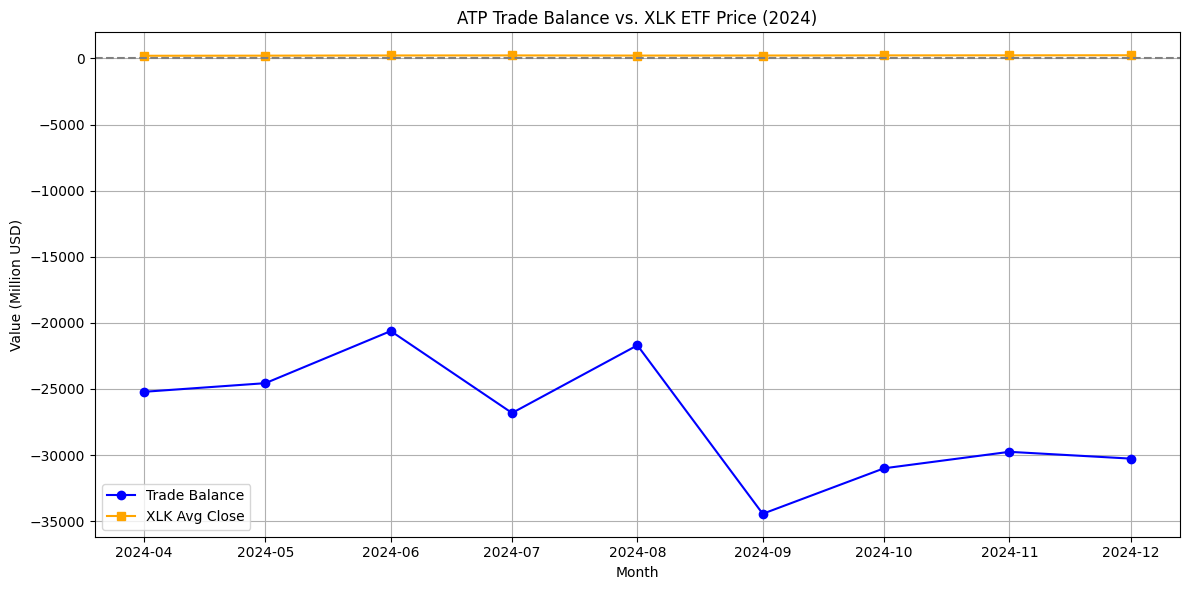

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

plt.plot(final_df['Month'], final_df['Trade_Balance'], label='Trade Balance', color='blue', marker='o')
plt.plot(final_df['Month'], final_df['XLK_Avg_Close'], label='XLK Avg Close', color='orange', marker='s')

plt.title('ATP Trade Balance vs. XLK ETF Price (2024)')
plt.xlabel('Month')
plt.ylabel('Value (Million USD)')
plt.axhline(0, linestyle='--', color='gray')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [18]:
# Correlation between trade and stock
final_df[['Import_Value', 'Export_Value', 'Trade_Balance', 'XLK_Avg_Close']].corr()


,Import_Value,Export_Value,Trade_Balance,XLK_Avg_Close
Import_Value,1.000000,0.267470,-0.849140,0.562394
Export_Value,0.267470,1.000000,0.281804,0.240510
Trade_Balance,-0.849140,0.281804,1.000000,-0.428172
XLK_Avg_Close,0.562394,0.240510,-0.428172,1.000000


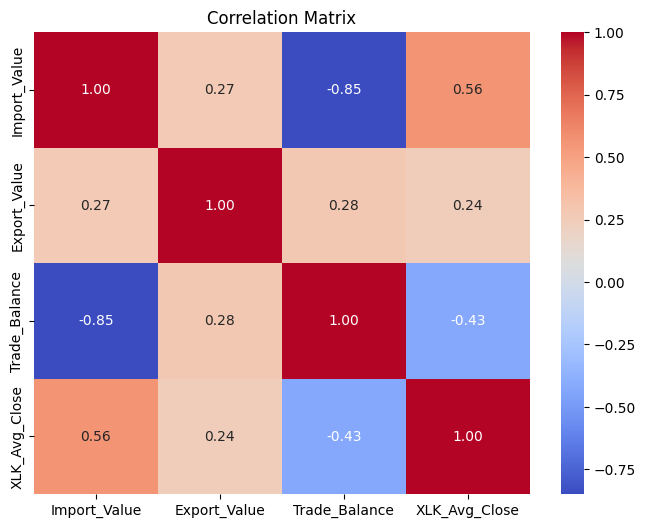

In [19]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(final_df[['Import_Value', 'Export_Value', 'Trade_Balance', 'XLK_Avg_Close']].corr(), 
            annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


In [21]:
# Month-over-Month % Change
final_df['Trade_Balance_%_Change'] = final_df['Trade_Balance'].pct_change() * 100
final_df['XLK_Change_%'] = final_df['XLK_Avg_Close'].pct_change() * 100
